In [ ]:
# ENCONTRANDO GRAU QUE MÍNIMZA A NORMA

In [23]:
using LinearAlgebra
using Plots

In [24]:
# Curva parametrizada
function X(t)
    return([ t^4-1.1*t^3-3.7*t+1;-0.5t^3+t^2-0.123;-1.1*t^3+4.0])
end

X (generic function with 1 method)

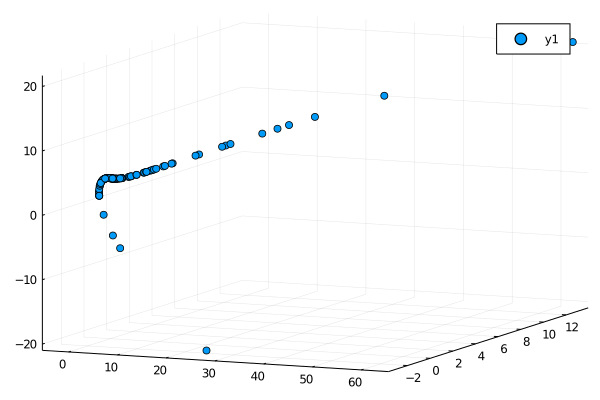

In [25]:
# Visualização dos pontos aleatórios da curva

# t = 1:0.5:1000

N = 100
t=randn(N,1)

# Cada coluna armazenará uma vetor
Z = Matrix{Float64}(undef,3,N)

for i in 1:N 
    Z[:,i] = X(t[i])
end

X1 = Z[1, :]
X2 = Z[2, :]
X3 = Z[3, :]

scatter3d(X1, X2, X3)


In [26]:
function monomio(d)
    # Função que gera as combinações possíveis de monômios ;
    # d: Grau do polinômio
    
    # Gerando combinações de expoentes
    exps = Tuple{Int,Int}[]
    for i in 0:d, j in 0:(d - i)
        push!(exps, (i, j))
    end
    return exps
end

monomio (generic function with 1 method)

In [27]:
function matrixA(x, y, d)
    # Função que gera a matriz A, combinação dos expoentes;
    # x: vetor
    # y: vetor
    # d: grau do polinômio
    
    exps = monomio(d)
    
    # Quantidade de combinações
    n = length(exps)
    
    # Quantidade de pares/coordenadas
    m = length(x)
    
    # Matriz das combinações dos monômios
    # qtd de pares X qtd de combinações i + j =< d 
    A = Matrix{Float64}(undef, m, n)
    
    for (col, (i, j)) in enumerate(exps)
        
         A[:, col] .= x.^i.*y.^j
        
    end
    
    return A
    
end

matrixA (generic function with 1 method)

In [51]:
function min_quadrados(x, y, d)
    # Função dos mínimos quadrados e termo fixado ;
    # x: vetor
    # y: vetor
    # d: grau do polinômio
    
    A = matrixA(x, y, d)
    
    # Partição de A e do vetor de coeficientes 
    B = A[:, 2:end]
    a = A[:, 1]

    # Solução mínimos quadrados
    xsol = copy(B\(-a))
    
    insert!(xsol, 1, 1)
    
    return (xsol, norm(A*xsol))
    
end

min_quadrados (generic function with 1 method)

In [55]:
#### TESTES ####

N = 100
t=randn(N,1)

# Cada coluna armazenará uma vetor
Z = Matrix{Float64}(undef,3,N)

for i in 1:N 
    Z[:,i] = X(t[i])
end

X1 = Z[1, :]
X2 = Z[2, :]
X3 = Z[3, :]

100-element Array{Float64,1}:
  4.000000158318564
  4.23423231884793
  4.000189616471032
  4.245636190030012
  6.3429993496483
  4.122404905356846
  4.0028198808759425
  3.9785321184797335
 -0.45130575286682184
  3.6098216744530784
  4.001702021559147
  4.003127467090439
  4.000150069063438
  ⋮
  1.6142945830035673
  8.971084591133422
  3.751669882354273
  3.849891236516479
  0.532558474617987
 11.530486007326783
  4.017430398454031
  3.8373822033475187
  1.538634602369211
  3.970362642670034
  3.0070159628254216
 14.330054085063583

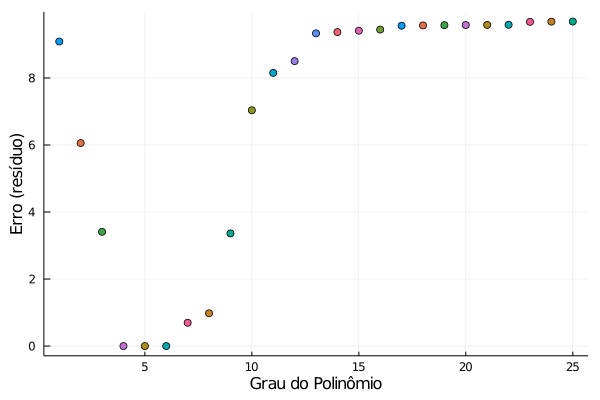

In [56]:
# GRAU ÓTIMO para P(X1, X2) - GRÁFICO DE DISPERSÃO

graph = plot(xlabel = "Grau do Polinômio", ylabel = "Erro (resíduo)")


for d in 1:25
    (_, Normresiduo) = min_quadrados(X1, X2, d)
    
    scatter!([d], [Normresiduo], label = false)
end

display(graph)

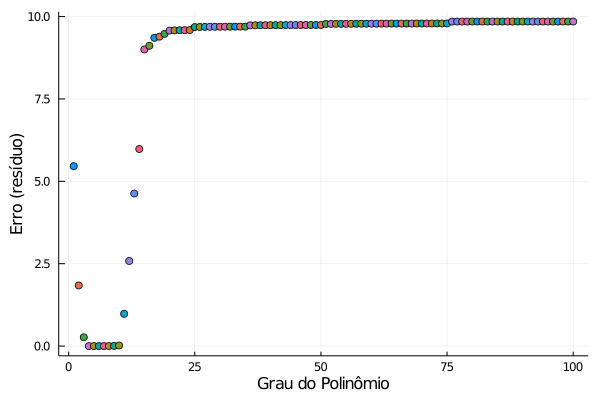

In [57]:
# GRAU ÓTIMO para P(X1, X3) - GRÁFICO DE DISPERSÃO

graph = plot(xlabel = "Grau do Polinômio", ylabel = "Erro (resíduo)")


for d in 1:100
    (_, Normresiduo) = min_quadrados(X1, X3, d)
    
    scatter!([d], [Normresiduo], label = false)
end

display(graph)